In [1]:
import pandas as pd
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

# Strategy: Static Entries and Exits
Using minute level data from our in-sample period (2018), find the mean of the spread and the standard deviation of the spread.  Use a constant multiple of the spread standard deviation as the upper and lower thresholds for our mean reversion strategy.  Signals are generated during our trading period when our spread is above/below our upper/lower threshold.  Note, the actual positions we take need to be lagged by 1 minute from our signals.  Without this shift, our results would be reliant on high-frequency trading technology and latency.

In [2]:
# Start from 01-01-2018 and end at 12-31-2018
qqq2018 = pd.read_csv("../data/qqqMinute2018.csv")
has2018 = pd.read_csv("../data/hasMinute2018.csv")
aapl2018 = pd.read_csv("../data/aaplMinute2018.csv")
ttwo2018 = pd.read_csv("../data/ttwoMinute2018.csv")
idxx2018 = pd.read_csv("../data/idxxMinute2018.csv")
sbux2018 = pd.read_csv("../data/sbuxMinute2018.csv")
ctas2018 = pd.read_csv("../data/ctasMinute2018.csv")
alxn2018 = pd.read_csv("../data/alxnMinute2018.csv")
algn2018 = pd.read_csv("../data/algnMinute2018.csv")
payx2018 = pd.read_csv("../data/payxMinute2018.csv")

In [3]:
qqq2018 = qqq2018.set_index('date_time')
qqq2018 = qqq2018.rename(columns={'close': 'qqqclose'})

has2018 = has2018.set_index('date_time')
has2018 = has2018.rename(columns={'close': 'hasclose'})

aapl2018 = aapl2018.set_index('date_time')
aapl2018 = aapl2018.rename(columns={'close': 'aaplclose'})

ttwo2018 = ttwo2018.set_index('date_time')
ttwo2018 = ttwo2018.rename(columns={'close': 'ttwoclose'})

idxx2018 = idxx2018.set_index('date_time')
idxx2018 = idxx2018.rename(columns={'close': 'idxxclose'})

sbux2018 = sbux2018.set_index('date_time')
sbux2018 = sbux2018.rename(columns={'close': 'sbuxclose'})

ctas2018 = ctas2018.set_index('date_time')
ctas2018 = ctas2018.rename(columns={'close': 'ctasclose'})

alxn2018 = alxn2018.set_index('date_time')
alxn2018 = alxn2018.rename(columns={'close': 'alxnclose'})

algn2018 = algn2018.set_index('date_time')
algn2018 = algn2018.rename(columns={'close': 'algnclose'})

payx2018 = payx2018.set_index('date_time')
payx2018 = payx2018.rename(columns={'close': 'payxclose'})

## Dataset for Engle-Granger Basket in 2018 (In-Sample Period)

In [4]:
eg_basket_data2018 = qqq2018[['qqqclose']].join([has2018[['hasclose']], aapl2018[['aaplclose']], ttwo2018[['ttwoclose']], 
                                                 sbux2018[['sbuxclose']], ctas2018[['ctasclose']], alxn2018[['alxnclose']], 
                                                 algn2018[['algnclose']], payx2018[['payxclose']]], how='outer')
eg_basket_data2018 = eg_basket_data2018.dropna()
eg_basket_data2018.tail(10)

,qqqclose,hasclose,aaplclose,ttwoclose,sbuxclose,ctasclose,alxnclose,algnclose,payxclose
2018-12-31 15:40:00,153.7400,81.2300,157.2500,103.1094,64.2900,167.4819,97.3400,209.6600,64.9600
2018-12-31 15:41:00,153.8144,81.2800,157.3299,103.1242,64.3000,167.4850,97.2400,209.6400,64.9962
2018-12-31 15:42:00,153.8100,81.3309,157.3600,103.1000,64.3650,167.5400,97.1800,209.6369,65.0200
2018-12-31 15:43:00,153.8500,81.2500,157.4300,103.1250,64.3650,167.6300,97.2800,209.7700,65.0200
2018-12-31 15:44:00,153.7760,81.2350,157.3800,103.0750,64.3679,167.5700,97.1400,209.4100,65.0250
2018-12-31 15:45:00,153.7900,81.2500,157.3400,103.0300,64.3700,167.5600,97.1317,209.5250,65.0550
2018-12-31 15:46:00,153.7700,81.2100,157.3484,102.9700,64.3850,167.4601,97.0600,209.4700,65.0500
2018-12-31 15:47:00,153.6800,81.1400,157.2915,102.9300,64.3500,167.3100,96.9800,209.3500,65.0150
2018-12-31 15:48:00,153.5750,81.0300,157.2400,102.8200,64.3200,167.2500,96.8900,209.1300,65.0000
2018-12-31 15:49:00,153.4300,80.9600,157.1500,102.6050,64.2500,167.1700,96.8000,208.7400,64.9500


## Dataset for Johansen Basket in 2018 (In-Sample Period)

In [5]:
joh_basket_data2018 = qqq2018[['qqqclose']].join([has2018[['hasclose']], ttwo2018[['ttwoclose']], idxx2018[['idxxclose']], 
                               sbux2018[['sbuxclose']], ctas2018[['ctasclose']], alxn2018[['alxnclose']]], how='outer')
joh_basket_data2018 = joh_basket_data2018.dropna()
joh_basket_data2018.tail(10)

,qqqclose,hasclose,ttwoclose,idxxclose,sbuxclose,ctasclose,alxnclose
2018-12-31 15:40:00,153.7400,81.2300,103.1094,185.5024,64.2900,167.4819,97.3400
2018-12-31 15:41:00,153.8144,81.2800,103.1242,185.7300,64.3000,167.4850,97.2400
2018-12-31 15:42:00,153.8100,81.3309,103.1000,185.6360,64.3650,167.5400,97.1800
2018-12-31 15:43:00,153.8500,81.2500,103.1250,185.9200,64.3650,167.6300,97.2800
2018-12-31 15:44:00,153.7760,81.2350,103.0750,185.6000,64.3679,167.5700,97.1400
2018-12-31 15:45:00,153.7900,81.2500,103.0300,185.6000,64.3700,167.5600,97.1317
2018-12-31 15:46:00,153.7700,81.2100,102.9700,185.6500,64.3850,167.4601,97.0600
2018-12-31 15:47:00,153.6800,81.1400,102.9300,185.4200,64.3500,167.3100,96.9800
2018-12-31 15:48:00,153.5750,81.0300,102.8200,185.1750,64.3200,167.2500,96.8900
2018-12-31 15:49:00,153.4300,80.9600,102.6050,185.0600,64.2500,167.1700,96.8000


In [6]:
syntheticAssetLogPriceEG2018 = eg_basket_data2018[['hasclose', 'aaplclose', 'ttwoclose', 'sbuxclose', 
                               'ctasclose', 'alxnclose', 'algnclose', 'payxclose']].apply(np.log)
qqqLogPriceEG2018 = np.log(eg_basket_data2018['qqqclose'].values)

syntheticAssetLogPriceJoh2018 = joh_basket_data2018[['hasclose', 'ttwoclose', 'sbuxclose', 
                               'idxxclose', 'ctasclose', 'alxnclose']].apply(np.log)
qqqLogPriceJoh2018 = np.log(joh_basket_data2018['qqqclose'].values)

In [7]:
kf_eg2018 = fn.multivariateKalmanFilter(syntheticAssetLogPriceEG2018, qqqLogPriceEG2018)
state_means_eg2018, state_covs_eg2018 = kf_eg2018.filter(qqqLogPriceEG2018)
basket_size_eg2018 = len(syntheticAssetLogPriceEG2018.columns)
slopes_eg2018 = state_means_eg2018[:, np.arange(0, basket_size_eg2018, 1)]
#intercept2018 = state_means2018[:, basket_size2018]

In [8]:
syntheticAssetEstimateEG2018 = [np.dot(slopes_eg2018[i], syntheticAssetLogPriceEG2018.values[i].T)
                              for i in range(len(slopes_eg2018))]
spread_ts_eg2018 = qqqLogPriceEG2018- syntheticAssetEstimateEG2018
eg_basket_data2018.reset_index(inplace=True)
eg_basket_data2018 = eg_basket_data2018.rename(columns={'index': 'datetime'})
eg_basket_data2018['logspread'] = spread_ts_eg2018
eg_basket_data2018['spread'] = np.exp(spread_ts_eg2018)

eg_backtest_data2018 = eg_basket_data2018[['datetime', 'qqqclose', 'hasclose', 'aaplclose', 'ttwoclose', 'sbuxclose', 
                      'ctasclose', 'alxnclose', 'algnclose', 'payxclose', 'spread']]
diff_thresh_eg = fn.calculateDiffThresh(eg_backtest_data2018, q=0.2)

In [9]:
print(diff_thresh_eg)

0.006773079365496303


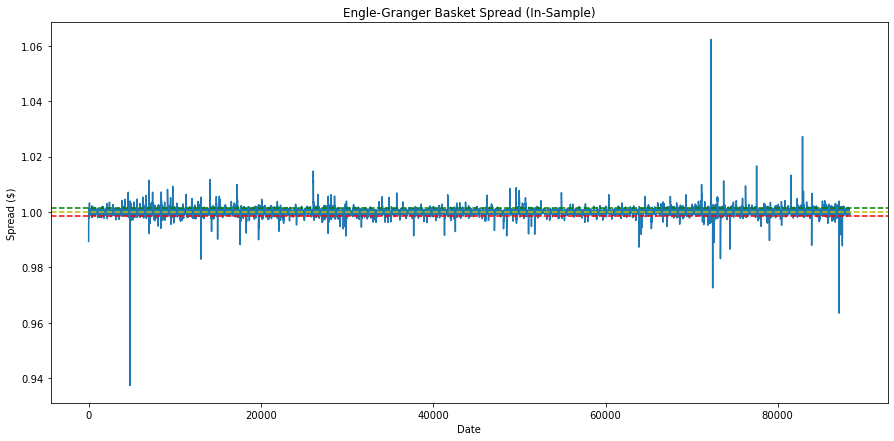

In [10]:
plt.figure(figsize = (15,7))
plt.plot(eg_backtest_data2018['spread'])
plt.title("Engle-Granger Basket Spread (In-Sample)")
plt.ylabel("Spread ($)")
plt.xlabel("Date")
spread_avg_eg = eg_backtest_data2018['spread'].mean()
spread_sd_eg = eg_backtest_data2018['spread'].std()
c = 1.25
upper_threshold_eg = spread_avg_eg + c * spread_sd_eg
lower_threshold_eg = spread_avg_eg - c * spread_sd_eg
plt.axhline(upper_threshold_eg, linestyle = 'dashed', color = 'g')
plt.axhline(spread_avg_eg, linestyle = 'dashed', color = 'y')
plt.axhline(lower_threshold_eg, linestyle = 'dashed', color = 'r')

In [11]:
print("Engle-Granger Basket Spread Thresholds \n")
print("Mean: ", spread_avg_eg)
print("Lower Bar: ", lower_threshold_eg)
print("Upper Bar: ", upper_threshold_eg)

Engle-Granger Basket Spread Thresholds 

Mean:  1.0000038266169735
Lower Bar:  0.9986041977577099
Upper Bar:  1.001403455476237


In [12]:
kf_Joh2018 = fn.multivariateKalmanFilter(syntheticAssetLogPriceJoh2018, qqqLogPriceJoh2018)
state_means_joh2018, state_covs_joh2018 = kf_Joh2018.filter(qqqLogPriceJoh2018)
basket_size_joh2018 = len(syntheticAssetLogPriceJoh2018.columns)
slopes_joh2018 = state_means_joh2018[:, np.arange(0, basket_size_joh2018, 1)]
#intercept = state_means[:, basket_size]

In [13]:
syntheticAssetEstimateJoh2018 = [np.dot(slopes_joh2018[i], syntheticAssetLogPriceJoh2018.values[i].T)
                              for i in range(len(slopes_joh2018))]
spread_ts_joh2018 = qqqLogPriceJoh2018- syntheticAssetEstimateJoh2018
joh_basket_data2018.reset_index(inplace=True)
joh_basket_data2018 = joh_basket_data2018.rename(columns={'index': 'datetime'})
joh_basket_data2018['logspread'] = spread_ts_joh2018
joh_basket_data2018['spread'] = np.exp(spread_ts_joh2018)

joh_backtest_data2018 = joh_basket_data2018[['datetime', 'qqqclose', 'hasclose','ttwoclose', 'sbuxclose', 
                      'ctasclose', 'alxnclose', 'spread']]
diff_thresh_joh = fn.calculateDiffThresh(joh_backtest_data2018, q=0.2)

C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spread_diff'] = 100 * (abs(spread_diff) / abs(data['spread'].shift(-1)))


In [14]:
print(diff_thresh_joh)

0.00829267998069854


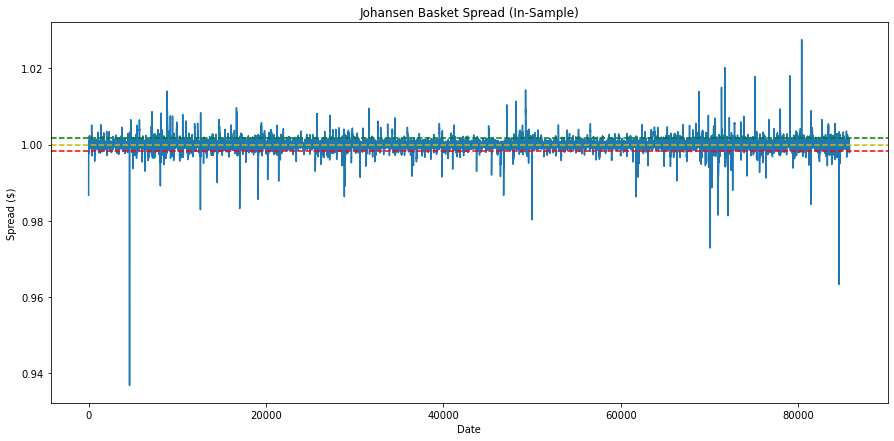

In [15]:
plt.figure(figsize = (15,7))
plt.plot(joh_basket_data2018['spread'])
plt.title("Johansen Basket Spread (In-Sample)")
plt.ylabel("Spread ($)")
plt.xlabel("Date")
spread_avg_joh = joh_basket_data2018['spread'].mean()
spread_sd_joh = joh_basket_data2018['spread'].std()
c = 1.25
upper_threshold_joh = spread_avg_joh + c * spread_sd_joh
lower_threshold_joh = spread_avg_joh - c * spread_sd_joh
plt.axhline(upper_threshold_joh, linestyle = 'dashed', color = 'g')
plt.axhline(spread_avg_joh, linestyle = 'dashed', color = 'y')
plt.axhline(lower_threshold_joh, linestyle = 'dashed', color = 'r')

In [16]:
print("Johansen Basket Spread Thresholds \n")
print("Mean: ", spread_avg_joh)
print("Lower Bar: ", lower_threshold_joh)
print("Upper Bar: ", upper_threshold_joh)

Johansen Basket Spread Thresholds 

Mean:  0.9999972006537783
Lower Bar:  0.9983366716176929
Upper Bar:  1.0016577296898637


# Backtest and Out-of-Sample Period

In [17]:
eg_data = pd.read_csv("../data/eg_basket_data.csv")
joh_data = pd.read_csv("../data/joh_basket_data.csv")

In [18]:
eg_backtest_data = eg_data[['datetime', 'qqqclose', 'hasclose', 'aaplclose', 'ttwoclose', 'sbuxclose', 
                      'ctasclose', 'alxnclose', 'algnclose', 'payxclose', 'spread']]
eg_backtest_data = fn.createBars(eg_backtest_data, lower_threshold_eg, upper_threshold_eg, spread_avg_eg)

C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['upperband'] = upper
C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lowerband'] = lower
C:\Users\liuvi\Documents\fall2020\f20_stat_arb\functions.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Text(0.5, 0, 'Date')

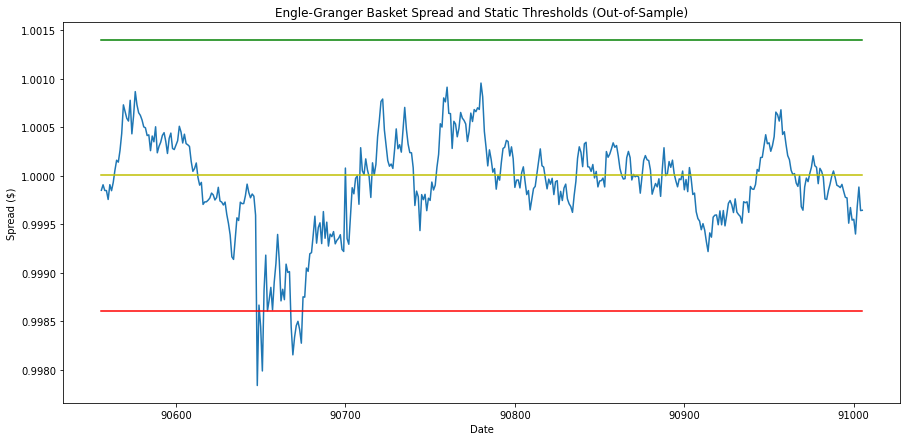

In [19]:
plt.figure(figsize = (15,7))
plt.plot(eg_backtest_data['spread'].iloc[-450:])
plt.plot(eg_backtest_data['upperband'].iloc[-450:], color='g')
plt.plot(eg_backtest_data['ema'].iloc[-450:], color='y')
plt.plot(eg_backtest_data['lowerband'].iloc[-450:], color='r')
plt.title("Engle-Granger Basket Spread and Static Thresholds (Out-of-Sample)")
plt.ylabel("Spread ($)")
plt.xlabel("Date")

In [20]:
joh_backtest_data = joh_data[['datetime', 'qqqclose', 'hasclose', 'ttwoclose', 'sbuxclose', 
                               'idxxclose', 'ctasclose', 'alxnclose', 'spread']]
joh_backtest_data = fn.createBars(joh_backtest_data, lower_threshold_joh, upper_threshold_joh, spread_avg_joh)

Text(0.5, 0, 'Date')

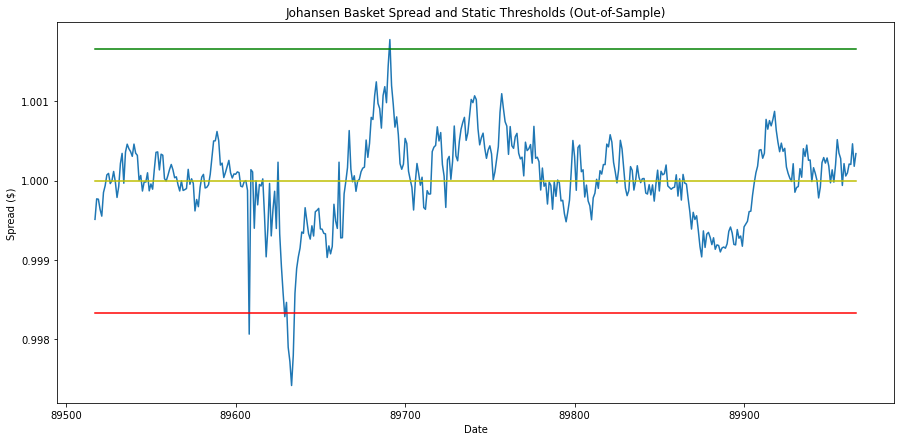

In [21]:
plt.figure(figsize = (15,7))
plt.plot(joh_backtest_data['spread'].iloc[-450:])
plt.plot(joh_backtest_data['upperband'].iloc[-450:], color='g')
plt.plot(joh_backtest_data['ema'].iloc[-450:], color='y')
plt.plot(joh_backtest_data['lowerband'].iloc[-450:], color='r')
plt.title("Johansen Basket Spread and Static Thresholds (Out-of-Sample)")
plt.ylabel("Spread ($)")
plt.xlabel("Date")

## Generating Signals and Positions
Positions are generated based on the thresholds determined in the in-sample period.  When the spread is below our lower threshold, a long signal is generated and we enter a long spread position in the subsequent minute.  Symmetrically, when the spread is above our upper threshold, a short signal is generated and we enter a short spread position in the subsequent minute.  When the spread reverts back to the mean from our in-sample period, we close our positions.

For our optimal positions, we aim to forecast the mean reversion by not only conditioning that the spread is above/below the upper/lower threshold, but also conditioning that the percentage difference in spread magnitude is in the bottom 20% of our in-sample period's percentage difference in spread from minute to minute.

In [22]:
eg_final_data = fn.createPositions(eg_backtest_data.copy()) # no overnight positions, all positions exited by EOD
eg_final_data_opt = fn.createOptimalPositions(eg_backtest_data.copy(), threshold=diff_thresh_eg)

C:\Users\liuvi\anaconda3\envs\quant\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
joh_final_data = fn.createPositions(joh_backtest_data.copy()) # no overnight positions, all positions exited by EOD
joh_final_data_opt = fn.createOptimalPositions(joh_backtest_data.copy(), threshold=diff_thresh_joh)

## Trade Log
The trade log is generated to compile all the individual trades executed in our backtest and some information about them.  This includes the start and end time, the holding period, what position was taken (long or short), position size and value, as well as profit and return information.  The information in this dataset can be used to analyze the strategy and the properties of the trades executed by the strategy.

### Engle-Granger Basket

In [24]:
slopes_eg = eg_data[['hasSlope', 'aaplSlope', 'ttwoSlope', 'sbuxSlope', 'ctasSlope', 'alxnSlope', 'algnSlope', 'payxSlopes']]
prices_eg = eg_final_data[['hasclose', 'aaplclose', 'ttwoclose', 'sbuxclose', 
                       'ctasclose', 'alxnclose', 'algnclose', 'payxclose']].values

In [25]:
tradeLog_eg, minuteDf_eg = fn.constructTradeLog(eg_final_data['datetime'].values, eg_final_data['position'].values,
                               eg_final_data['qqqclose'].values, prices_eg, 
                               slopes_eg.values.round(3), stoploss = None,
                               lot_size = 1000)
tradeLog_eg.tail()

,start,end,holdingPeriod,position,positionSizeY,entryY,exitY,positionSizeX,entryX,exitX,initialPortfolioValue,trade_profit,trade_returns
657,2019-12-23 09:42:00,2019-12-23 10:33:00,50,long,1000,211.9300,211.8300,"[76.0, 249.0, 111.0, 67.0, 221.0, 97.0, 136.0,...","[104.51, 281.81, 123.23, 88.67, 270.86, 110.08...","[104.5828, 282.29, 123.54, 88.44, 270.615, 109...",423234.5900,-275.1858,-0.000650
658,2019-12-24 09:46:00,2019-12-24 09:52:00,5,short,1000,211.6000,211.5001,"[76.0, 249.0, 111.0, 67.0, 220.0, 96.0, 136.0,...","[104.96, 282.9240000000001, 122.9, 88.04, 269....","[104.8899, 283.3072, 123.62, 88.21, 269.2975, ...",422911.2980,112.6807,0.000266
659,2019-12-26 09:42:00,2019-12-26 11:30:00,101,short,1000,212.6200,213.0700,"[76.0, 249.0, 111.0, 67.0, 220.0, 96.0, 136.0,...","[105.43, 285.7888, 123.8, 88.33, 268.36, 110.1...","[104.99, 288.0901, 123.6479, 88.0586, 267.78, ...",424761.3744,-225.4595,-0.000531
660,2019-12-30 09:53:00,2019-12-30 10:12:00,19,long,1000,211.7400,211.7550,"[76.0, 249.0, 111.0, 67.0, 220.0, 96.0, 136.0,...","[105.23, 286.915, 123.17, 87.6177, 267.09, 108...","[105.38, 286.19, 123.26, 87.445, 267.39, 108.3...",423484.7565,132.3815,0.000313
661,2019-12-31 09:42:00,2019-12-31 10:37:00,52,long,1000,212.2324,211.9248,"[76.0, 249.0, 111.0, 67.0, 220.0, 96.0, 136.0,...","[105.615, 291.9495, 122.08, 87.75, 268.65, 106...","[106.12899999999999, 291.5695, 121.94, 87.5953...",425527.2955,-588.8791,-0.001384


In [26]:
tradeLog_eg_opt, minuteDf_eg_opt = fn.constructTradeLog(eg_final_data_opt['datetime'].values, 
                                                        eg_final_data_opt['position'].values,
                                                        eg_final_data_opt['qqqclose'].values, prices_eg, 
                                                        slopes_eg.values.round(3), stoploss = None,
                                                        lot_size = 1000)
tradeLog_eg_opt.tail()

,start,end,holdingPeriod,position,positionSizeY,entryY,exitY,positionSizeX,entryX,exitX,initialPortfolioValue,trade_profit,trade_returns
311,2019-12-18 09:54:00,2019-12-18 10:18:00,24,long,1000,209.55,209.6100,"[76.0, 248.0, 111.0, 67.0, 222.0, 97.0, 136.0,...","[102.7, 279.6399, 121.475, 88.295, 273.4318, 1...","[102.6379, 279.9, 121.63, 87.92, 271.75, 108.0...",420194.0551,374.2063,0.000891
312,2019-12-18 11:10:00,2019-12-18 11:23:00,13,short,1000,209.67,209.9799,"[76.0, 248.0, 111.0, 67.0, 221.0, 97.0, 136.0,...","[102.245, 279.66, 121.47, 87.89, 270.89, 107.9...","[102.585, 279.8999, 121.69, 88.03, 272.64, 107...",419418.5550,360.6902,0.000860
313,2019-12-18 12:32:00,2019-12-18 12:43:00,11,long,1000,209.93,209.9100,"[76.0, 248.0, 111.0, 67.0, 221.0, 97.0, 136.0,...","[102.9461, 280.9799, 122.57, 88.13, 273.405, 1...","[102.915, 280.98, 122.56, 88.15, 272.3867, 108...",420799.8514,265.5176,0.000631
314,2019-12-23 09:44:00,2019-12-23 10:33:00,48,long,1000,211.92,211.8300,"[76.0, 249.0, 111.0, 67.0, 221.0, 97.0, 136.0,...","[104.75, 281.69, 123.29, 88.6101, 270.24, 110....","[104.5828, 282.29, 123.54, 88.44, 270.615, 109...",423026.9467,-462.8291,-0.001094
315,2019-12-31 10:07:00,2019-12-31 10:37:00,28,long,1000,211.82,211.9248,"[76.0, 249.0, 111.0, 67.0, 220.0, 96.0, 136.0,...","[105.96, 290.8794, 122.36, 87.65, 269.07, 107....","[106.12899999999999, 291.5695, 121.94, 87.5953...",425082.5806,-208.7940,-0.000491


<ipython-input-27-11a0b2b65bde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_df_eg['cumulative_returns'] = np.cumprod(1 + minuteDf_eg['returns'])


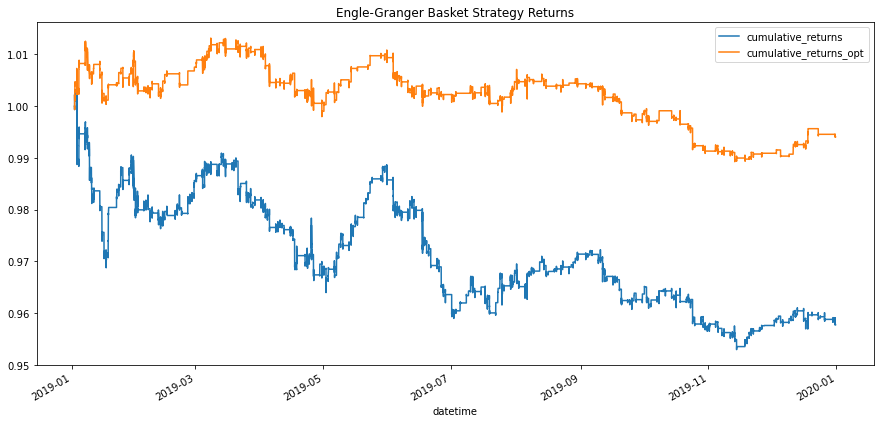

In [27]:
returns_df_eg = minuteDf_eg[['datetime']]
returns_df_eg['cumulative_returns'] = np.cumprod(1 + minuteDf_eg['returns'])
returns_df_eg['cumulative_returns_opt'] = np.cumprod(1 + minuteDf_eg_opt['returns'])
returns_df_eg = returns_df_eg.set_index('datetime')
returns_df_eg.plot(figsize=[15, 7], title='Engle-Granger Basket Strategy Returns')

In [28]:
daily_eg = fn.calculateDailyReturns(minuteDf_eg[['returns', 'datetime']])
daily_eg_opt = fn.calculateDailyReturns(minuteDf_eg_opt[['returns', 'datetime']])
sharpe_eg = fn.calculateAnnualizedSharpeRatio(daily_eg)
sharpe_eg_opt = fn.calculateAnnualizedSharpeRatio(daily_eg_opt)

In [29]:
print("Engle-Granger Basket Backtest Results")
print("Returns: ", (returns_df_eg['cumulative_returns'].iloc[-1] - 1) * 100, '%')
print("Returns (Optimized): ", (returns_df_eg['cumulative_returns_opt'].iloc[-1] - 1) * 100, '%')
print("Sharpe: ", sharpe_eg)
print("Sharpe (Optimized)", sharpe_eg_opt)

Engle-Granger Basket Backtest Results
Returns:  -4.222442438046626 %
Returns (Optimized):  -0.5957102214630972 %
Sharpe:  -1.3211050391055017
Sharpe (Optimized) -0.31938347838313974


### Johansen Basket

In [30]:
slopes_joh = joh_data[['hasSlope', 'ttwoSlope', 'sbuxSlope', 'idxxSlope', 'ctasSlope', 'alxnSlope']]
prices_joh = joh_final_data[['hasclose', 'ttwoclose', 'sbuxclose', 'idxxclose', 'ctasclose', 'alxnclose']].values

In [31]:
tradeLog_joh, minuteDf_joh = fn.constructTradeLog(joh_final_data['datetime'].values, joh_final_data['position'].values,
                               joh_final_data['qqqclose'].values, prices_joh, 
                               slopes_joh.values.round(3), stoploss = None,
                               lot_size = 1000)
tradeLog_joh.tail()

,start,end,holdingPeriod,position,positionSizeY,entryY,exitY,positionSizeX,entryX,exitX,initialPortfolioValue,trade_profit,trade_returns
637,2019-12-30 09:51:00,2019-12-30 10:16:00,25,long,1000,211.7000,211.2500,"[115.0, 151.0, 110.0, 263.0, 265.0, 140.0]","[105.255, 123.0301, 87.72, 262.5, 267.055, 108...","[105.07, 122.96, 87.19, 261.1926, 266.59, 107.55]",406964.1091,176.1953,0.000433
638,2019-12-30 10:20:00,2019-12-30 10:36:00,16,short,1000,211.4542,211.5698,"[115.0, 151.0, 111.0, 263.0, 265.0, 140.0]","[104.5503, 123.11, 87.3, 261.18, 266.6, 107.65]","[105.01, 123.14, 87.11, 261.39, 267.6, 107.71]",406167.7345,249.3355,0.000614
639,2019-12-31 09:42:00,2019-12-31 09:43:00,1,long,1000,212.2324,212.3100,"[115.0, 151.0, 111.0, 263.0, 265.0, 140.0]","[105.615, 122.08, 87.75, 261.5, 268.65, 106.875]","[105.635, 122.13, 87.6822, 261.76, 268.83, 106...",407481.7050,-35.5122,-0.000087
640,2019-12-31 10:04:00,2019-12-31 10:37:00,32,long,1000,211.9901,211.9248,"[115.0, 151.0, 111.0, 263.0, 265.0, 140.0]","[105.8011, 122.33, 87.711, 261.19, 269.08, 107...","[106.12899999999999, 121.94, 87.5953, 261.96, ...",407387.5475,-220.2358,-0.000541
641,2019-12-31 11:13:00,2019-12-31 11:28:00,13,short,1000,211.8780,211.6900,"[115.0, 151.0, 111.0, 263.0, 265.0, 140.0]","[105.79, 121.875, 87.6801, 260.95, 267.99, 106...","[105.95, 121.75, 87.61, 260.93, 267.95, 107.235]",406778.5261,224.9239,0.000553


In [32]:
tradeLog_joh_opt, minuteDf_joh_opt = fn.constructTradeLog(joh_final_data_opt['datetime'].values, 
                                                          joh_final_data_opt['position'].values,
                                                          joh_final_data_opt['qqqclose'].values, prices_joh, 
                                                        slopes_joh.values.round(3), stoploss = None,
                                                        lot_size = 1000)
tradeLog_joh_opt.tail()

,start,end,holdingPeriod,position,positionSizeY,entryY,exitY,positionSizeX,entryX,exitX,initialPortfolioValue,trade_profit,trade_returns
326,2019-12-23 09:48:00,2019-12-23 10:20:00,31,long,1000,211.950,211.9500,"[114.0, 150.0, 110.0, 264.0, 264.0, 140.0]","[104.9799, 123.21, 88.6301, 261.54, 270.52, 11...","[104.9875, 123.29, 88.5359, 261.17, 270.82, 11...",408055.7596,22.9756,0.000056
327,2019-12-26 10:05:00,2019-12-26 12:14:00,122,short,1000,212.770,212.9700,"[114.0, 151.0, 110.0, 264.0, 265.0, 140.0]","[105.23, 123.43, 88.07, 261.14, 269.53, 110.35]","[104.83, 123.3875, 88.04, 260.59, 267.22, 108.94]",408907.2600,-1210.0675,-0.002959
328,2019-12-27 09:45:00,2019-12-27 09:56:00,10,short,1000,214.200,213.8000,"[115.0, 151.0, 111.0, 264.0, 265.0, 140.0]","[105.22399999999999, 123.97, 87.84, 260.75, 26...","[105.359, 123.3, 87.81, 260.96, 267.92, 108.88]",409956.1450,260.7900,0.000636
329,2019-12-30 09:52:00,2019-12-30 10:16:00,24,long,1000,211.805,211.2500,"[115.0, 151.0, 110.0, 263.0, 265.0, 140.0]","[105.2305, 123.27, 87.7005, 262.48, 267.32, 10...","[105.07, 122.96, 87.19, 261.1926, 266.59, 107.55]",407170.5725,172.6587,0.000424
330,2019-12-30 10:21:00,2019-12-30 10:36:00,15,short,1000,211.590,211.5698,"[115.0, 151.0, 111.0, 263.0, 265.0, 140.0]","[104.6012, 122.9, 87.285, 260.88, 267.02, 107.7]","[105.01, 123.14, 87.11, 261.39, 267.6, 107.71]",406315.4130,373.2570,0.000919


<ipython-input-33-bfd3d650f774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returns_df_joh['cumulative_returns'] = np.cumprod(1 + minuteDf_joh['returns'])


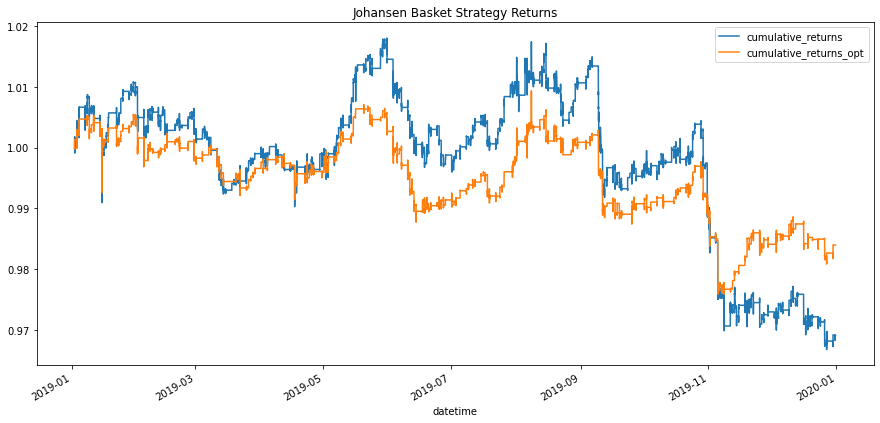

In [33]:
returns_df_joh = minuteDf_joh[['datetime']]
returns_df_joh['cumulative_returns'] = np.cumprod(1 + minuteDf_joh['returns'])
returns_df_joh['cumulative_returns_opt'] = np.cumprod(1 + minuteDf_joh_opt['returns'])
returns_df_joh = returns_df_joh.set_index('datetime')
returns_df_joh.plot(figsize=[15, 7], title='Johansen Basket Strategy Returns')

In [34]:
daily_joh = fn.calculateDailyReturns(minuteDf_joh[['returns', 'datetime']])
daily_joh_opt = fn.calculateDailyReturns(minuteDf_joh_opt[['returns', 'datetime']])
sharpe_joh = fn.calculateAnnualizedSharpeRatio(daily_joh)
sharpe_joh_opt = fn.calculateAnnualizedSharpeRatio(daily_joh_opt)

In [35]:
print("Johansen Basket Backtest Results")
print("Returns: ", (returns_df_joh['cumulative_returns'].iloc[-1] - 1) * 100, '%')
print("Returns (Optimized): ", (returns_df_joh['cumulative_returns_opt'].iloc[-1] - 1) * 100, '%')
print("Sharpe: ", sharpe_joh)
print("Sharpe (Optimized)", sharpe_joh_opt)

Johansen Basket Backtest Results
Returns:  -3.091990021895763 %
Returns (Optimized):  -1.6022303196784327 %
Sharpe:  -0.9177351129956287
Sharpe (Optimized) -0.6816679803795664
